In [1]:
import pandas as pd
import env
import wrangle_draft

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

from sklearn.model_selection import train_test_split

df, train, validate, test = wrangle_draft.wrangle_zillow()


# Exploring data-
    -verifying no nulls
    -looking for outliers
    -looking for correlations

In [2]:
df, train, validate, test = wrangle_draft.wrangle_zillow()

In [3]:
df = train
# i wrote my code with 'df' so I'm makeing df = train 

In [4]:
df.head()

,bed,bath,sqft,tax_value,yearbuilt,fips,zip
9993,3.0,2.0,3520.0,2539000.0,1928.0,6037.0,96049.0
47684,3.0,2.0,1177.0,248290.0,1962.0,6111.0,97089.0
29549,2.0,2.0,1419.0,799000.0,1942.0,6037.0,96424.0
9968,3.0,1.0,1074.0,34333.0,1948.0,6037.0,96270.0
16893,2.0,2.0,1754.0,835344.0,1923.0,6037.0,95985.0


In [5]:
df.isnull().sum()

bed          0
bath         0
sqft         0
tax_value    0
yearbuilt    0
fips         0
zip          0
dtype: int64

In [6]:
df.columns.tolist()

['bed', 'bath', 'sqft', 'tax_value', 'yearbuilt', 'fips', 'zip']

In [7]:
for column in df.columns:
    print(column)
    print(df[column].value_counts())
    print("-----------------")

bed
3.0     13025
4.0      8596
2.0      4583
5.0      2244
6.0       381
1.0       337
7.0        62
0.0        34
8.0        16
9.0         3
12.0        1
14.0        1
11.0        1
10.0        1
Name: bed, dtype: int64
-----------------
bath
2.0     12192
3.0      6055
1.0      5365
2.5      2156
4.0      1211
3.5       530
5.0       458
1.5       448
4.5       411
6.0       172
5.5       122
7.0        56
8.0        33
6.5        28
0.0        21
9.0        10
7.5        10
10.0        3
18.0        1
13.0        1
8.5         1
11.0        1
Name: bath, dtype: int64
-----------------
sqft
1120.0    74
1200.0    61
1080.0    59
936.0     54
1296.0    52
          ..
3935.0     1
4408.0     1
5359.0     1
4442.0     1
6222.0     1
Name: sqft, Length: 4115, dtype: int64
-----------------
tax_value
455000.0     18
600000.0     17
450000.0     16
430000.0     15
585000.0     14
             ..
786055.0      1
98257.0       1
339531.0      1
1779462.0     1
1214890.0     1
Name: tax_v

# Visual aids!!

bed


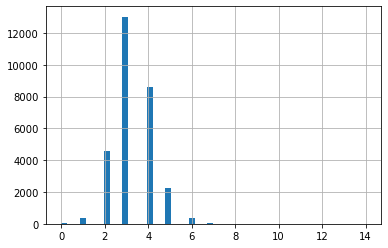

bath


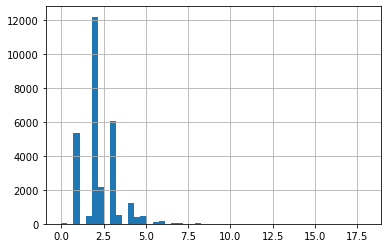

sqft


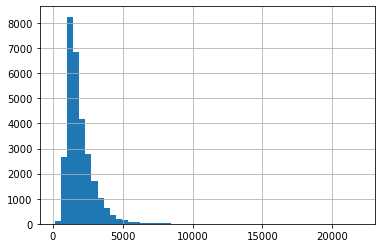

tax_value


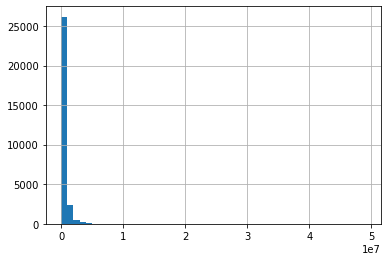

yearbuilt


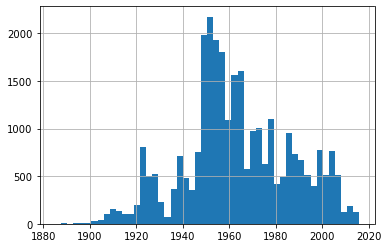

fips


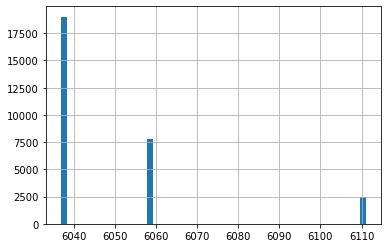

zip


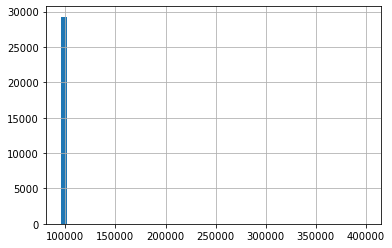

In [8]:
for col in df.columns:
    print(col)
    df[col].hist(bins=50)
    plt.show()

# Pair plots!!

In [9]:
def plot_variable_pairs(df):
    return sns.pairplot(df.sample(5000), diag_kind = 'kde', kind = 'reg', corner=True)

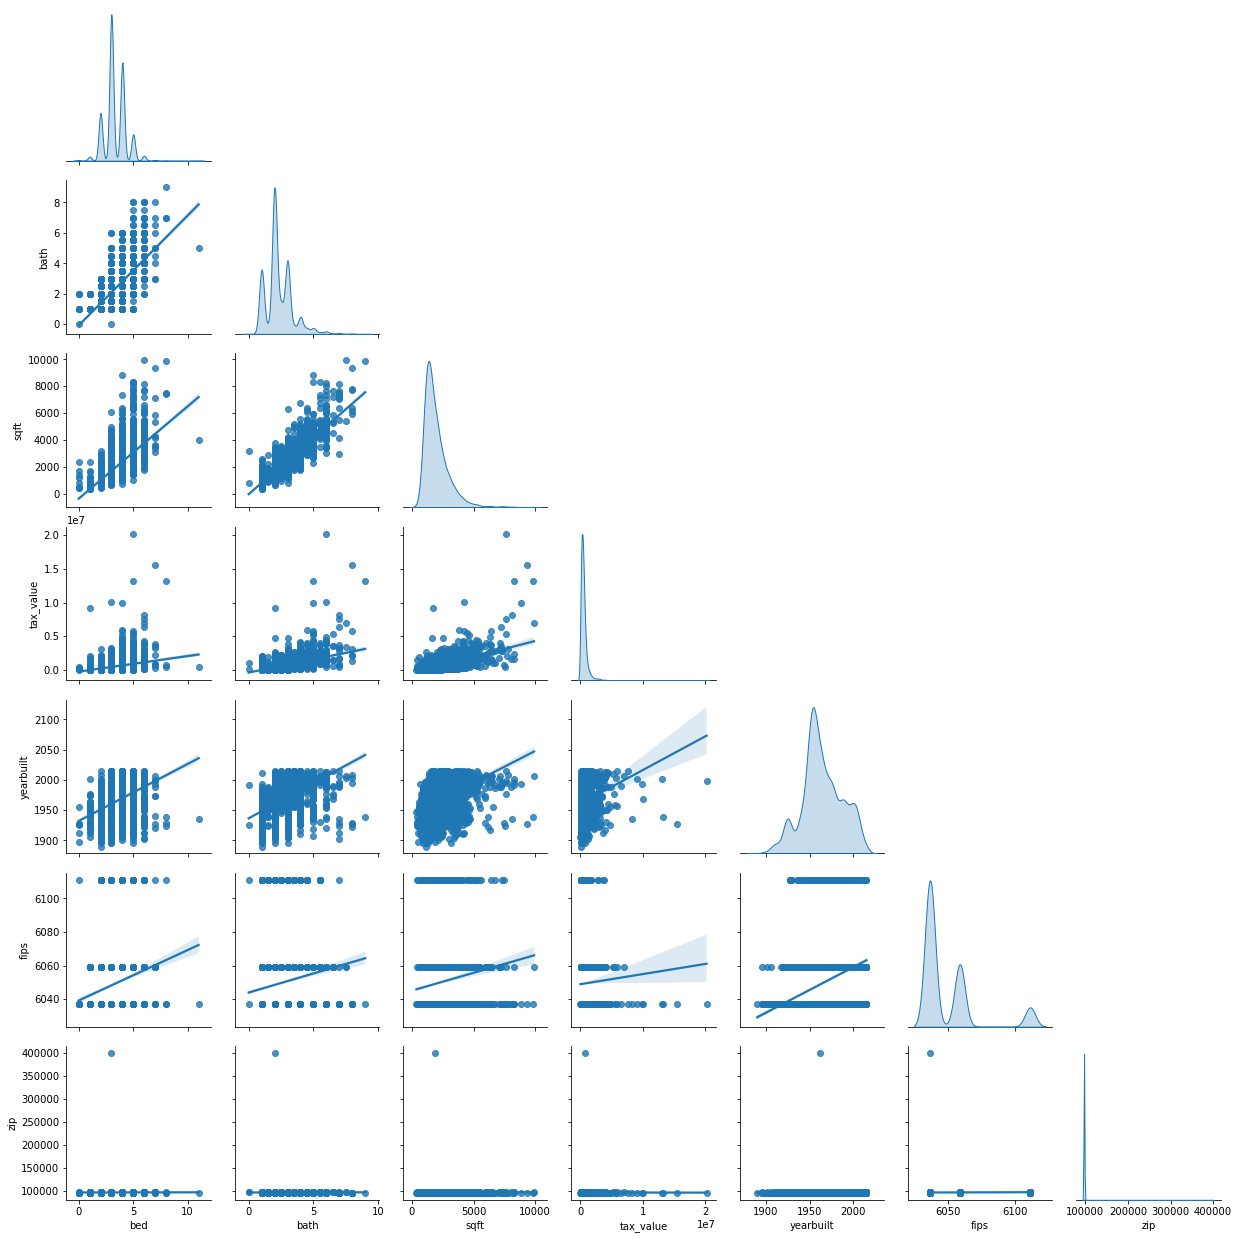

In [10]:
plot_variable_pairs(train)

# Catagorical Outliers

In [11]:
#estimates on potential outlier rules

In [12]:
#     df = df[(df.bathroomcnt < 7) & (df.bathroomcnt > 0)]
#     df = df[(df.bedroomcnt < 7) & (df.bedroomcnt > 0)]
#     df = df[(df.zip < 150_000)]

In [13]:
#make sure I'm not losing too much data

In [14]:
# What percentage of properties have 6 or less bathrooms?
df[df.bath < 7].shape[0] / df.shape[0]

0.9960389277787263

In [15]:
# What percentage of properties have 6 or less bedrooms?
df[df.bed < 7].shape[0] / df.shape[0]

0.9970974901826873

# continuous outliers

<AxesSubplot:xlabel='bed', ylabel='tax_value'>

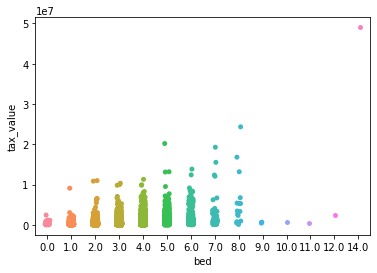

In [16]:
sns.stripplot(x = df.bed, y = df.tax_value)

<AxesSubplot:xlabel='sqft', ylabel='tax_value'>

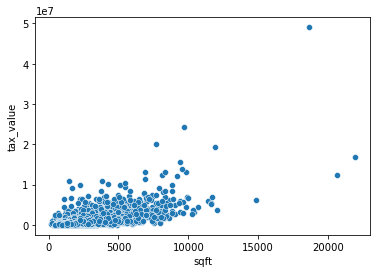

In [17]:
sns.scatterplot(x = train.sqft, y = train.tax_value)

In [18]:
sqft = train[train.sqft < 10_000]

In [19]:
sqft = pd.DataFrame(sqft)

In [20]:
tax = train[train.tax_value < 6_500_000]

In [21]:
tax = pd.DataFrame(tax)

<AxesSubplot:xlabel='sqft', ylabel='tax_value'>

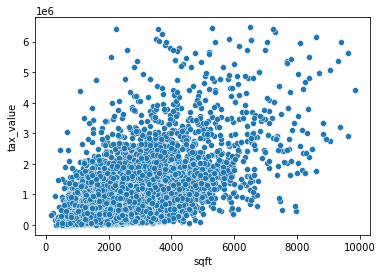

In [22]:
sns.scatterplot(x = sqft.sqft, y = tax.tax_value)

<AxesSubplot:xlabel='bed', ylabel='tax_value'>

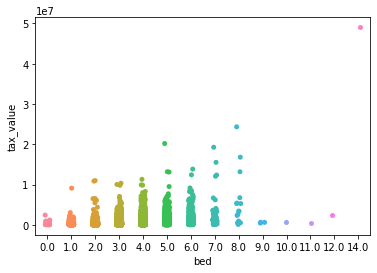

In [23]:
sns.stripplot(x = df.bed, y = df.tax_value)

In [24]:
tax = train[train.tax_value < 3_000_000]

<AxesSubplot:xlabel='bed', ylabel='tax_value'>

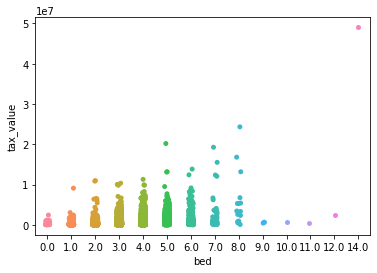

In [25]:
sns.stripplot(x = df.bed, y = df.tax_value)

<AxesSubplot:xlabel='sqft', ylabel='tax_value'>

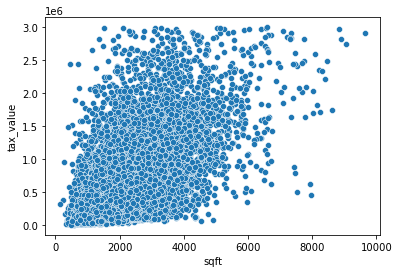

In [26]:
sns.scatterplot(x = sqft.sqft, y = tax.tax_value)

In [27]:
sqft = train[train.sqft < 7_000]

<AxesSubplot:xlabel='sqft', ylabel='tax_value'>

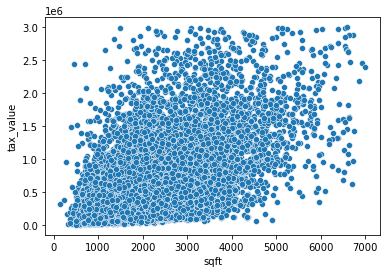

In [28]:
sns.scatterplot(x = sqft.sqft, y = tax.tax_value)

In [29]:
df[df.sqft < 7_000].shape[0] / df.shape[0]

0.9961413693016903

In [30]:
df[df.tax_value < 3_000_000].shape[0]/df.shape[0]

0.9886289909509988

# Apply first round of outlier filters!!

In [31]:
df = df[(df.bath < 7) & (df.bath > 0)]
df = df[(df.bed < 7) & (df.bed > 0)]
df = df[df.sqft < 7_000]
df = df[df.tax_value < 3_000_000]
df = df[df.zip < 150_000]

# Keep exploring!!


Write a function named plot_categorical_and_continuous_vars that accepts your dataframe and the name of the columns that hold the continuous and categorical features and outputs 3 different plots for visualizing a categorical variable and a continuous variable.

In [32]:
cat_col = list(df[['bed', 'bath', 'yearbuilt', 'zip']])

In [33]:
cat_col

['bed', 'bath', 'yearbuilt', 'zip']

In [34]:
cont_col = list(df[['sqft']])
cont_col

['sqft']

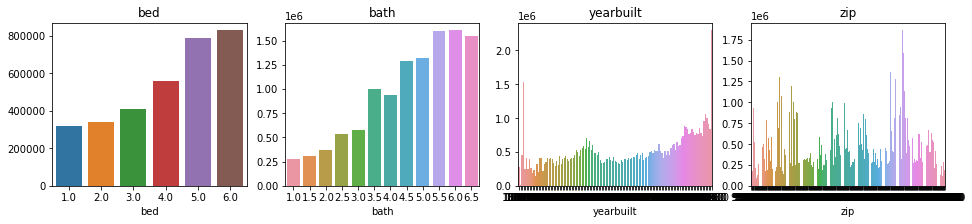

In [35]:
plt.figure(figsize=(16, 3))

for i, col in enumerate(cat_col):

    # i starts at 0, but plot nos should start at 1
    plot_number = i + 1

    l= len(cat_col)

    plt.subplot(1,l,plot_number)

    # Title with column name.
    plt.title(col)

    sns.barplot(x = df.groupby(col).tax_value.mean().index, y = df.groupby(col).tax_value.mean().values,)

# why i decided yearbuilt outliers

In [36]:
train.groupby('yearbuilt').tax_value.mean()

yearbuilt
1885.0    2.810000e+05
1887.0    1.587000e+04
1888.0    4.517875e+05
1889.0    1.526776e+06
1890.0    2.551245e+05
              ...     
2012.0    1.704439e+06
2013.0    1.281440e+06
2014.0    1.186063e+06
2015.0    1.292338e+06
2016.0    2.292545e+06
Name: tax_value, Length: 129, dtype: float64

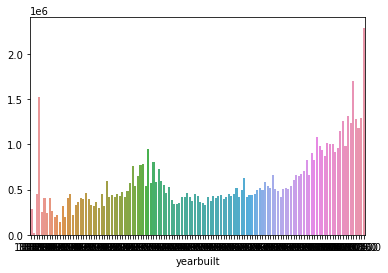

In [37]:
ax = sns.barplot(x = train.groupby('yearbuilt').tax_value.mean().index, y = train.groupby('yearbuilt').tax_value.mean().values,)


In [38]:
train2 = train[train.yearbuilt>=1890]

<AxesSubplot:xlabel='yearbuilt'>

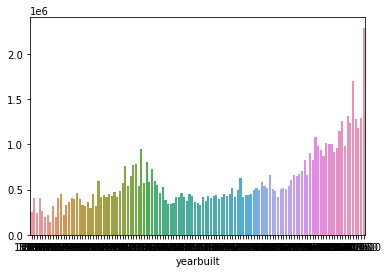

In [39]:
sns.barplot(x = train2.groupby('yearbuilt').tax_value.mean().index, y = train2.groupby('yearbuilt').tax_value.mean().values,)


# Add year outlier!!

In [40]:
df = df[df.yearbuilt>=1890]

In [41]:
def plot_categorical_and_continuous_vars_attempt_1(df, cat_col, cont_col):

    plt.figure(figsize=(16, 3))

    for i, col in enumerate(cat_col):

        # i starts at 0, but plot nos should start at 1
        plot_number = i + 1

        l= len(cat_col)

        plt.subplot(1,l,plot_number)

        # Title with column name.
        plt.title(col)

        sns.barplot(x = df.groupby(col).tax_value.mean().index, y = df.groupby(col).tax_value.mean().values)

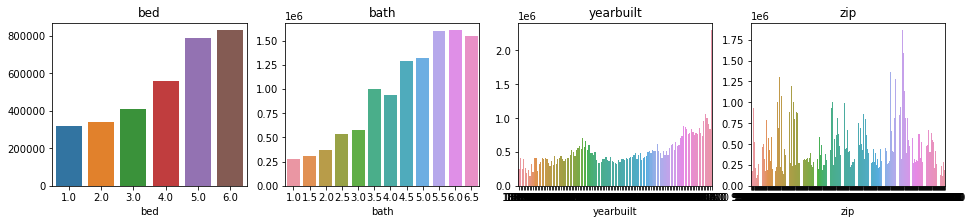

In [42]:
plot_categorical_and_continuous_vars_attempt_1(df, cat_col, cont_col)

In [43]:
def plot_categorical_and_continuous_vars(df, cat_col, cont_col):

    for i, col in enumerate(cat_col):
        plt.figure(figsize=(16, 3))
        # i starts at 0, but plot nos should start at 1
        plot_number = i + 1

        l= len(cat_col)

        plt.subplot(1,l,plot_number)

        # Title with column name.
        plt.title(col)
        
        sns.stripplot(x = df[col], y = df.tax_value)
        #--------------------------------------------------------------
        plt.figure(figsize=(16, 3))
        # i starts at 0, but plot nos should start at 1
        plot_number = i + 1

        l= len(cat_col)

        plt.subplot(1,l,plot_number)

        # Title with column name.
        plt.title(col)
        
        sns.boxplot(df[col], y = df.tax_value)
        
        #--------------------------------------------------------------
        plt.figure(figsize=(16, 3))
        # i starts at 0, but plot nos should start at 1
        plot_number = i + 1

        l= len(cat_col)

        plt.subplot(1,l,plot_number)

        # Title with column name.
        plt.title(col)
        
        sns.barplot(df[col], y = df.tax_value)

/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt

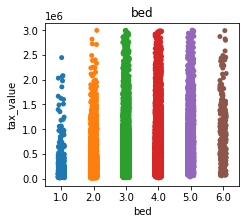

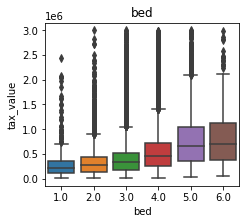

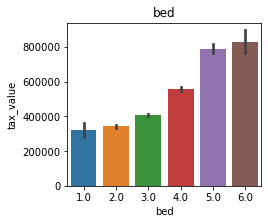

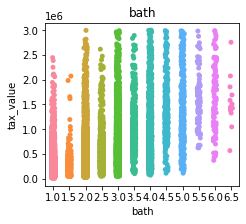

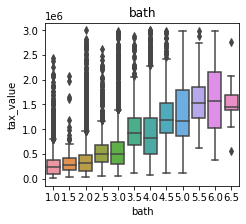

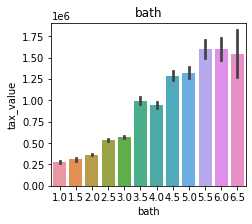

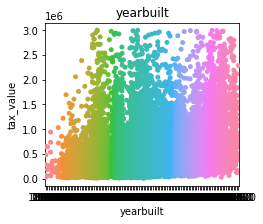

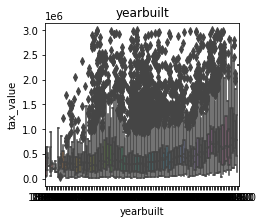

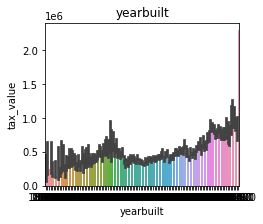

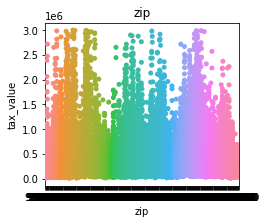

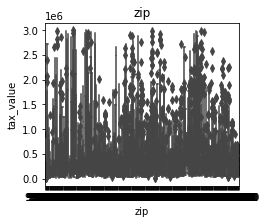

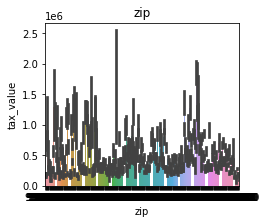

In [44]:
plot_categorical_and_continuous_vars(df, cat_col, cont_col)

# Heat map!

In [45]:
train_cor = train.corr()
train_cor

,bed,bath,sqft,tax_value,yearbuilt,fips,zip
bed,1.000000,0.650856,0.633975,0.285413,0.385780,0.132160,0.025637
bath,0.650856,1.000000,0.855020,0.529323,0.526414,0.107085,0.035631
sqft,0.633975,0.855020,1.000000,0.610861,0.460507,0.109296,0.033823
tax_value,0.285413,0.529323,0.610861,1.000000,0.174954,0.021659,0.024826
yearbuilt,0.385780,0.526414,0.460507,0.174954,1.000000,0.295878,0.050421
fips,0.132160,0.107085,0.109296,0.021659,0.295878,1.000000,0.026028
zip,0.025637,0.035631,0.033823,0.024826,0.050421,0.026028,1.000000


<AxesSubplot:>

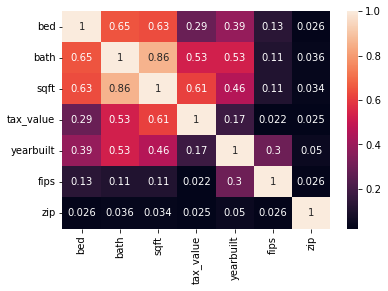

In [46]:
sns.heatmap(train_cor, annot = True)

In [47]:
#sqft and bath are stongly correlated-perhaps I'll only use one of them in the models
# tax value and sqft are strongly correlated



# Dependent variable stats   
Run the appropriate statistical tests where needed. 

In [48]:
alpha = .05

In [49]:
r_bed, p_bed = stats.pearsonr(x=train.bed, y = train.tax_value)
r_bed, p_bed

(0.28541340028289386, 0.0)

In [50]:
r_bath, p_bath = stats.pearsonr(x=train.bath, y = train.tax_value)
r_bath, p_bath

(0.529323163355841, 0.0)

In [51]:
r_sqft, p_sqft = stats.pearsonr(x=train.sqft, y = train.tax_value)
r_sqft, p_sqft

(0.6108608126789236, 0.0)

# Takeaway
What independent variables are correlated with the dependent variable, home value?


p < alpha for both bed and bath. Therefore, there are correlated.

the correlation coefficient is grater for baths, it indicates a stronger correlation



# Independent variable stats
Which independent variables are correlated with other independent variables (bedrooms, bathrooms, year built, square feet)?

In [52]:
r, p = stats.pearsonr(x=train.bed, y = train.bath)
r, p

(0.6508556298023179, 0.0)

In [53]:
r, p = stats.pearsonr(x=train.yearbuilt, y = train.bed)
r, p

(0.3857801806856409, 0.0)

In [54]:
r, p = stats.pearsonr(x=train.yearbuilt, y = train.sqft)
r, p

(0.46050678933716716, 0.0)

In [55]:
r, p = stats.pearsonr(x=train.bed, y = train.sqft)
r, p

(0.6339746839503501, 0.0)

In [56]:
r, p = stats.pearsonr(x=train.bath, y = train.sqft)
r, p

(0.8550200395023783, 0.0)

# Takeaway
-correlation between independent variables, perhaps feature engineering can combine a few

# Explore Takeaways

In [57]:
# Implement outliers into wrangle file

- df = df[df.yearbuilt>=1890]
- df = df[df.sqft < 7_000]
- df = df[df.tax < 3_000_000]
- df = df[(df.bathroomcnt < 7) & (df.bathroomcnt > 0)]
- df = df[(df.bedroomcnt < 7) & (df.bedroomcnt > 0)]
- df = df[(df.zip < 150_000)]

In [58]:
#     - target variable trends nicely with beds, bath, sqft 
#     - I think I will sqft and not bath in the model phase since they are so statistically correlated
